# PROBLEM STATEMENT


- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**



<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Thermometer_CF.svg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Convert Celsius to Fahrenheit [Image Source: https://commons.wikimedia.org/wiki/File:Thermometer_CF.svg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [20]:
!pip install tensorflow-gpu==2.9.2
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# STEP #1: IMPORT DATASETS

In [21]:
dataset = pd.read_csv('Celsius+to+Fahrenheit.csv')
dataset.reset_index(drop=True, inplace=True)

In [22]:
dataset.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [23]:
dataset.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [25]:
dataset.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# STEP #2: VISUALIZE DATASET

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


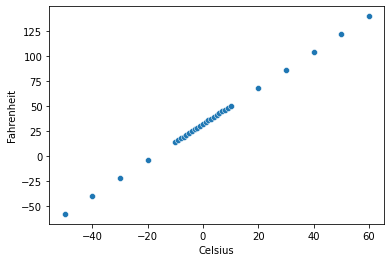

In [26]:
sns.scatterplot(dataset['Celsius'], dataset['Fahrenheit'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [27]:
X_train = dataset['Celsius']
y_train = dataset['Fahrenheit']


# STEP#4: BUILD AND TRAIN THE MODEL

In [28]:
X_train.shape

(30,)

In [29]:
y_train.shape

(30,)

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [33]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 236ms/step - loss: 1995.9979
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1385.1282
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1036.5885
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 923.6674
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 970.2242
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 1059.6917
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1099.6230
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 1064.4683
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 975.2125
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 866.9988
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 771.0271
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 706.7438
Epoch 13/100
1/1 [===========

# STEP#5: EVALUATING THE MODEL 

In [34]:
epochs_hist.history.keys()

dict_keys(['loss'])

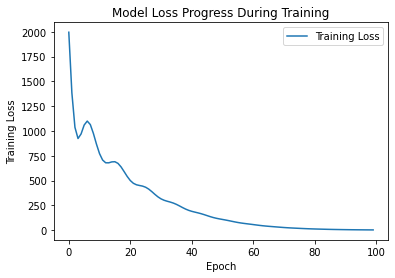

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [36]:
model.get_weights()

[array([[1.8055854]], dtype=float32), array([30.833677], dtype=float32)]

In [37]:
# Use the trained model to perform predictions

Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


1/1 [==============================] - 0s 60ms/step
Temperature in degF Using Trained ANN = [[30.833677]]


In [38]:
# Let's confirm this Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0
